# Week 5 - Genetic Algorithms
---

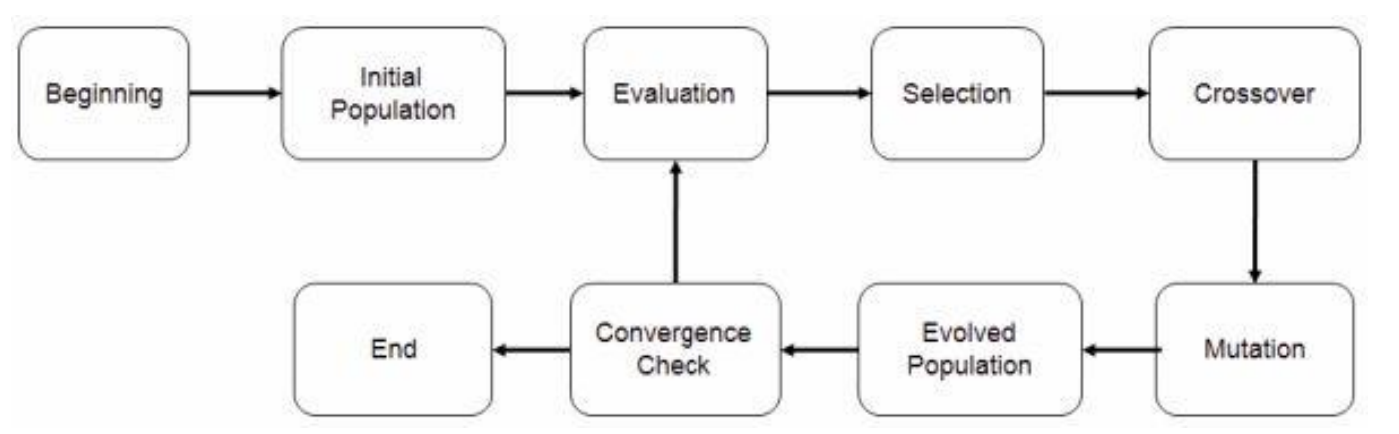

---

# Classic toy example - evolving a string

## Implementation in class

In [228]:
from IPython.display import clear_output, display
from tqdm.auto import tqdm
import random
import numpy as np

In [229]:
# random.seed(42)

In [230]:
genes = "abcdefghijklmnopqrstuvwxyz "
target = "the quick brown fox jumps over the lazy dog"

In [231]:
len("abcdefghijklmnopqrstuvwxyz ")

27

In [232]:
def randomAgent(genes, dna_size):
    return ''.join(random.choices(genes, k=dna_size))

In [233]:
def initPopulation(genes, dna_size, pop_size):
    result = []
    for _ in range(pop_size):
        result.append(randomAgent(genes, dna_size))

    return result

In [234]:
def fitness(dna, target):
    return sum(x == y for x, y in zip(dna, target))

In [235]:
def crossover(a, b):
    i = random.randint(0, len(a)-1)
    return a[:i] + b[i:], a[i:] + b[:i]

In [244]:
def mutate(agent, genes, mut_prob = 0.1):
    return ''.join([a if random.random() > mut_prob else random.choice(genes) for a in agent] )

In [237]:
mutate('asdadsads', genes, mut_prob = 0.1)

'asdadsads'

In [238]:
random.choice(genes)

'm'

In [239]:
def nextGeneration(population, target, fitness, mut_prob = 0.1):
    new_pop_size = len(population) // 2
    result = sorted(population, key=lambda x: fitness(x, target))[new_pop_size:]
    pop_fitness = [fitness(x, target) for x in result]
    best = result[-1]
    left_parents = random.choices(result, weights=pop_fitness, k=new_pop_size)
    right_parents = random.choices(result, weights=pop_fitness, k=new_pop_size)

    for i in range(new_pop_size):
        left_child, right_child = crossover(left_parents[i], right_parents[i])
        left_child, right_child = mutate(left_child, genes, mut_prob), mutate(right_child, genes, mut_prob)
        if fitness(left_child, target) > fitness(right_child, target):
            result.append(left_child)
        else:
            result.append(right_child)

    return result, best


In [240]:
def generate(target, genes, fitness, generations = 10000, pop_size=20, mut_prob=0.5):
    population = initPopulation(genes, len(target), pop_size)
    best = population[0]

    for _ in range(generations):
        # print(best)
        population, best = nextGeneration(population, target, fitness, mut_prob)
        if best == target:
            return best, True
        
    return best, False

In [253]:
generate(target, genes, fitness, mut_prob=0.1)

('the quick brown fox jumps over the lazy dog', True)

In [242]:
genes

'abcdefghijklmnopqrstuvwxyz '

In [243]:
list(zip([1,2], [3, 4]))

[(1, 3), (2, 4)]